<a href="https://colab.research.google.com/github/BrianIto/ML_DEN_RNA/blob/main/One_Hot_Encoding_na_proteina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ns1 = pd.read_csv('E_protein.csv')

In [2]:
#Transforma String do vetor do CSV em vetor.
sequences = ns1["sequences"].str.replace("[", "")
sequences = sequences.str.replace("]", "")
sequences = sequences.str.replace("'", "")
sequences = np.array(sequences.str.split(", "))
ns1.sequences = sequences
ns1.shape

(271, 4)

In [3]:
#Severa == 1 e Classica == 0
ns1["Label"] = (ns1["outcome"] == "Severa").astype(int)

train_labels = np.array(ns1["Label"])
train_labels

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0])

In [4]:
data_dict = {}

#Cria Dicionário de Frequência
for i, sequence in enumerate(np.array(ns1["sequences"])):
  for j, codon in enumerate(sequence):
    if (codon in data_dict):
      data_dict[codon] += 1
    else:
      data_dict[codon] = 1

#Cria Dicionário de Ranking de Aparição
def getMaior(dict):
  max, maxKey = -1, ''
  for key in dict:
    if (max < dict[key]):
      max = dict[key]
      maxKey = key
  return max, maxKey
  
size = len(data_dict.keys())

data_dict_copy = data_dict.copy()
dict_final = {}

for i in range(0, size):
  max, maxKey = getMaior(data_dict_copy)
  del data_dict_copy[maxKey]
  dict_final[maxKey] = i

In [5]:
for i in range(0, ns1["sequences"].shape[0]):
  for j in range(0, len(ns1["sequences"].loc[i])):
    ns1["sequences"].loc[i][j] = dict_final[ns1["sequences"].loc[i][j]]

In [6]:
ns1

,sequences,serotype,outcome,outcome_bin,Label
0,"[22, 19, 19, 14, 38, 7, 4, 7, 35, 2, 44, 13, 4...",3,Severa,Severa,1
1,"[22, 19, 19, 14, 38, 7, 4, 7, 35, 53, 44, 13, ...",3,Severa,Severa,1
2,"[22, 19, 19, 14, 38, 7, 4, 7, 35, 53, 44, 13, ...",3,Severa,Severa,1
3,"[22, 19, 19, 14, 38, 7, 4, 7, 35, 53, 44, 13, ...",3,Classica,Classica,0
4,"[22, 27, 19, 14, 38, 7, 4, 7, 33, 53, 18, 31, ...",3,Classica,Classica,0
...,...,...,...,...,...
266,"[15, 59, 22, 49, 17, 21, 8, 0, 20, 3, 28, 49, ...",1,Classica,Classica,0
267,"[15, 59, 22, 49, 17, 21, 8, 0, 20, 3, 28, 49, ...",1,Classica,Classica,0
268,"[15, 59, 22, 49, 17, 21, 8, 11, 20, 3, 28, 49,...",1,Classica,Classica,0
269,"[15, 59, 22, 49, 17, 21, 8, 11, 20, 3, 28, 49,...",1,Classica,Classica,0


In [7]:
arr = np.array(ns1.sequences)

matriz = []
for i, lista in enumerate(arr):
  matriz_dispersao = np.zeros(size)
  for j, elem in enumerate(lista):
    matriz_dispersao[elem] += 1
  matriz.append(matriz_dispersao.astype(int))

train_data = np.array(matriz)
train_data.shape
ns1["matriz_disp"] = matriz
ns1

,sequences,serotype,outcome,outcome_bin,Label,matriz_disp
0,"[22, 19, 19, 14, 38, 7, 4, 7, 35, 2, 44, 13, 4...",3,Severa,Severa,1,"[18, 23, 23, 4, 12, 14, 8, 17, 5, 17, 8, 10, 9..."
1,"[22, 19, 19, 14, 38, 7, 4, 7, 35, 53, 44, 13, ...",3,Severa,Severa,1,"[16, 22, 22, 7, 13, 13, 8, 18, 4, 17, 7, 10, 8..."
2,"[22, 19, 19, 14, 38, 7, 4, 7, 35, 53, 44, 13, ...",3,Severa,Severa,1,"[17, 22, 22, 5, 13, 13, 8, 18, 4, 18, 7, 10, 8..."
3,"[22, 19, 19, 14, 38, 7, 4, 7, 35, 53, 44, 13, ...",3,Classica,Classica,0,"[18, 23, 22, 4, 11, 13, 8, 17, 5, 18, 7, 11, 8..."
4,"[22, 27, 19, 14, 38, 7, 4, 7, 33, 53, 18, 31, ...",3,Classica,Classica,0,"[16, 22, 19, 6, 13, 16, 8, 18, 3, 16, 5, 12, 8..."
...,...,...,...,...,...,...
266,"[15, 59, 22, 49, 17, 21, 8, 0, 20, 3, 28, 49, ...",1,Classica,Classica,0,"[18, 14, 9, 21, 19, 13, 15, 5, 22, 4, 17, 13, ..."
267,"[15, 59, 22, 49, 17, 21, 8, 0, 20, 3, 28, 49, ...",1,Classica,Classica,0,"[18, 14, 9, 21, 19, 13, 14, 5, 22, 4, 17, 13, ..."
268,"[15, 59, 22, 49, 17, 21, 8, 11, 20, 3, 28, 49,...",1,Classica,Classica,0,"[17, 15, 9, 19, 18, 14, 15, 5, 23, 4, 14, 12, ..."
269,"[15, 59, 22, 49, 17, 21, 8, 11, 20, 3, 28, 49,...",1,Classica,Classica,0,"[18, 17, 10, 18, 19, 11, 15, 5, 23, 5, 18, 11,..."


In [8]:
import tensorflow as tf

series = ns1["matriz_disp"].copy()
slist = series.to_list()
train_data = np.array(slist)

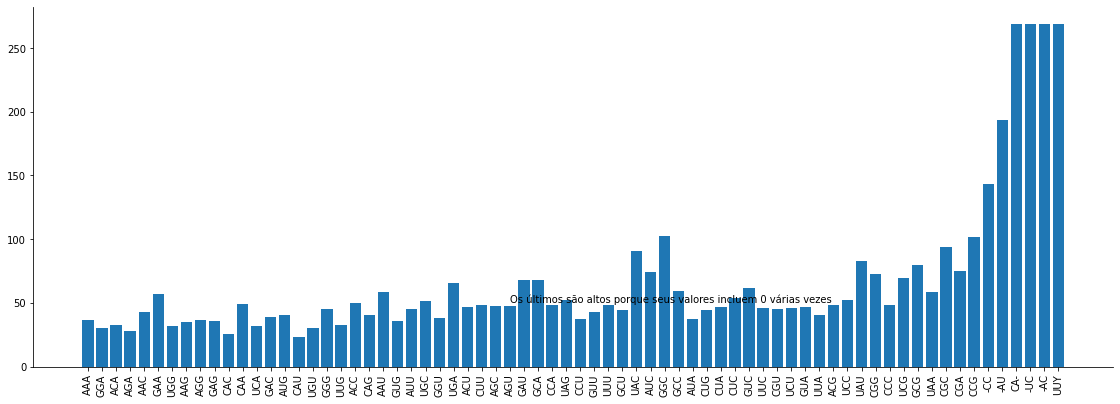

In [9]:
arr = np.array(ns1["matriz_disp"].to_list())

igualdade = np.zeros(arr.shape)

def checaIgualdadeComOutrosElementos(el, vetor):
  acumulador = 0
  for i, elem in enumerate(vetor):
    if (elem == el):
      acumulador += 1
  return acumulador

for i in range(0, arr.shape[1]):
  col = arr[:,i:i+1].reshape(-1)
  for j in range(0, arr.shape[0]):
    igualdade[j, i] = (checaIgualdadeComOutrosElementos(col[j], col))

medias = np.zeros(70)
for i in range(0, igualdade.shape[1]):
  medias[i] = igualdade[:, i:i+1].reshape(-1).mean()

reversed_dict = {value : key for (key, value) in dict_final.items()}

arr_codons = []
for i in range(0, len(reversed_dict)):
   arr_codons.append(reversed_dict[i])

fig = plt.figure(figsize=(15, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(arr_codons, medias)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.xticks(rotation=90)
plt.annotate("Os últimos são altos porque seus valores incluem 0 várias vezes", xy=(len(arr_codons) - 35, np.max(medias) - 50), xytext=(30, 50))
plt.show()

In [10]:
#Normalização do Train Data

train_stats = pd.DataFrame(train_data).describe()
train_stats = train_stats.transpose()

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

# train_data = normalize(train_data)
# train_data

train_data = norm(pd.DataFrame(train_data))
train_data = train_data.to_numpy()

In [16]:
from keras import models, Model
from keras import layers 
import keras

def build_model():
    inputs = layers.Input(shape=(size,)) # placeholder
    x = layers.Dense(32, activation='relu')(inputs)
    out = layers.Dense(1, activation='sigmoid')( x )

    model = Model(inputs=[inputs], outputs=[out], name="mnits_model")

    model.summary()

    opt = keras.optimizers.SGD(learning_rate=0.01)

    model.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy'])
    return model
  
modelito = build_model()

halfShape = int(np.floor(( ns1.shape[0] /2 )))

history = modelito.fit(train_data[:halfShape], train_labels[:halfShape], epochs=8, batch_size=25, 
                      validation_data=(train_data[halfShape: ns1.shape[0]], train_labels[ halfShape: ns1.shape[0] ]))

Model: "mnits_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2272      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
6/6 [==============================] - 1s 53ms/step - loss: 0.5846 - accuracy: 0.6535 - val_loss: 0.6987 - val_accuracy: 0.5882
Epoch 2/8
6/6 [==============================] - 0s 7ms/step - loss: 0.5929 - accuracy: 0.5826 - val_loss: 0.6935 - val_accuracy: 0.6029
Epoch 3/8
6/6 [==============================] - 0s 7ms/step - loss: 0.5235 - accuracy: 0.6794 - val_loss: 0

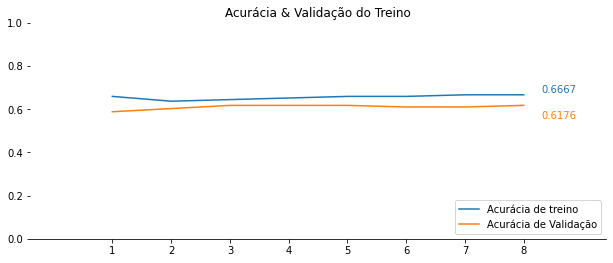

In [17]:

fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([0,0,1,1])
epochs = list(range(1, len(history.history["accuracy"]) + 1))
ax.plot(pd.Series(epochs).astype(int), history.history["accuracy"])
ax.plot(epochs, history.history["val_accuracy"])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.margins(0.2)
ax.set_ylim(ymin=0, ymax= 1)
plt.xticks(epochs, epochs)
plt.legend(["Acurácia de treino", "Acurácia de Validação"], loc="lower right")
plt.title("Acurácia & Validação do Treino")
plt.text(len(epochs) + 0.3, 
         np.max(history.history["accuracy"]) + 0.01, str(round(np.max(history.history["accuracy"]), 4)),
         color="#1f77b4")
plt.text(len(epochs) + 0.3, np.max(history.history["val_accuracy"]) - 0.06, str(round(np.max(history.history["val_accuracy"]), 4)),
         color="#ff7f04")
plt.show()

In [18]:
amount = 271
initial = int(np.floor(amount / 2))

test, val = train_data[initial:amount], train_labels[initial:amount]

prediction = modelito.predict(test)

arr_prediction = pd.Series(tf.greater(prediction, 0.5).numpy().reshape(-1))
arr_prediction = arr_prediction.astype(int).to_numpy()

falsos_negativos, falsos_positivos = 0,0
acertos_positivos, acertos_negativos = 0,0

for index, valor in enumerate(arr_prediction):
  if valor == val[index]:
    if (valor == 1): acertos_positivos += 1
    if (valor == 0): acertos_negativos += 1
  else:
    if (valor == 1): falsos_positivos += 1
    if (valor == 0): falsos_negativos += 1

print("(Início do Vetor, Fim do Vetor): ", (initial, amount))
print(pd.Series(val).value_counts())
print()
print("Matriz de Confusão:")
print(np.array([[acertos_positivos, falsos_negativos],
       [falsos_positivos, acertos_negativos]]))
print()
acertos, erros = acertos_negativos + acertos_positivos, falsos_positivos + falsos_negativos
print("Quantidade de (acertos, erros, porcentagens): ", (acertos, erros, np.round(acertos / (amount - initial) * 100, 3), np.round(erros / (amount - initial) * 100, 3)))

(Início do Vetor, Fim do Vetor):  (135, 271)
0    93
1    43
dtype: int64

Matriz de Confusão:
[[16 27]
 [25 68]]

Quantidade de (acertos, erros, porcentagens):  (84, 52, 61.765, 38.235)
